# Introduction

This project is based on building a book recommendation system. But first, what is a recommender system?  In this notebook, we delve    into the concept and implement key techniques to create one.

## What is a Recommender System?

A recommender system predicts which books a user is likely to enjoy based on their past behaviour and interactions. For example, an online bookstore could offer recommendations based on what the user has purchased, rated, or viewed. The point is to recommend books that the user hasn't discovered yet but is likely to like.

---
 ### Types of Recommender Systems

#### 1. **User-Based Collaborative Filtering**
This approach recommends books based on the analysis of user interactions and finding others with similar tastes. 

**Example**: 
- Reader A rates *Harry Potter* and *Twilight*. 
- Reader B rates *Harry Potter*. 
- *Twilight* is recommended to Reader B based on similarity.

#### 2. **Item-Based Collaborative Filtering** 
This technique compares books instead of users in order to make recommendations.

**Example** :
If the same readers rate *Harry Potter* and *The Lord of the Rings* highly, *The Lord of the Rings* can be recommended to those that interacted with *Harry Potter*.


# 1. Importing Libraries 📚

In [1]:
import pandas as pd  #data manipulation and analysis, especially for structured datasets like CSV files.
import numpy as np  #numerical computing, handling arrays, and performing mathematical operations.

#Visualization such as line charts, bar graphs, and scatter plots.
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot
import missingno as msno
import plotly.graph_objects as go


##scaling and statistical functions
from sklearn.metrics.pairwise import cosine_similarity  # Function to calculate cosine similarity, useful for measuring the similarity between vectors in recommendation systems.
import re  # Module for regular expression operations, used for pattern matching and text manipulation.


from PIL import Image  # Library for opening, manipulating, and saving images in different formats.
import requests  # Library for making HTTP requests to access data from APIs or download files.
import random  # Module for generating random numbers or selecting random elements from a sequence.

# NLP 
from sklearn.feature_extraction.text import CountVectorizer  # Tool for converting text data into a vectorized format, often used in NLP tasks.
import nltk  # Library for natural language processing, providing tools for text analysis, tokenization, and more.
from nltk.corpus import stopwords  # Module from NLTK to access stopwords, commonly used for removing irrelevant words in text preprocessing.

#Suppress warnings 
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

# 2. Information About Data 📑

---


The Book-Recommendation dataset consists of three files:

---

#### **1. Users**
- Contains user information.
- User IDs (`User-ID`) have been anonymized and mapped to integers.
- Demographic data, such as `Location` and `Age`, is included if available. If not, these fields contain `NULL` values.

---

#### **2. Books**
- Books are identified by their respective `ISBN`.
- Invalid `ISBN`s have been removed from the dataset.
- Additional content-based information is provided, including:
  - `Book-Title`
  - `Book-Author` (only the first author is listed in cases of multiple authors)
  - `Year-Of-Publication`
  - `Publisher`
- URLs linking to cover images are available in three sizes:
  - `Image-URL-S`: Small
  - `Image-URL-M`: Medium
  - `Image-URL-L`: Large
- These URLs point to images hosted on the Amazon website.

---

#### **3. Ratings**
- Contains book rating information.
- Ratings (`Book-Rating`) can be:
  - **Explicit**: Values from 1–10, where higher values indicate greater appreciation.
  - **Implicit**: Represented by a value of `0`.

---


**Reading CSV Files**

In [2]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

**Head of data**

In [3]:
books.head(5)

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [4]:
ratings.head(5)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [5]:
users.head(5)

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

**Shape of Data**

In [6]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


**Data Types**

In [7]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [8]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [9]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

**Checking Null Values**

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

There are a small number of null values in the dataset, which can be handled by filling them with placeholder (dummy) values.

In [11]:
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = books.isnull().sum().sum()
total_cells = books.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 7,which is 0.00% of total data.


In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

There are no null values in the ratings data.

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

There are no null values in the users data.

**Checking Duplicated Values**

In [14]:
books.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
users.duplicated().sum()

0

# 2. Exploratory Data Analysis 🏕

👉 Within this segment, we aim to explore the data and visually uncover potential patterns or insights to understand the data better.

* First, we start by removing invalid or missing year data.

In [17]:
temp=books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]
books.drop(temp.index, axis=0, inplace=True)

👉 We will create a function to filter and include only the top 20 books. This approach helps in focusing on the most relevant data and enhances the clarity of visualizations.

In [18]:
def plot_top20(df, column, title, x_label, y_label, top=20, template='plotly_white'):
    # Get the count of each book and take the top 'n' (or all)
    pl = df[column].value_counts().head(top)
    
    # Find the book with the maximum count
    most_published_book = pl.idxmax()  # This gets the book with the maximum value
    most_published_count = pl.max()   # This gets the count for the most published book

    # Create the bar chart using Plotly Express with a softer color palette
    fig = px.bar(
        x=pl.index,  # x-axis is the index (i.e., the unique values in the column)
        y=pl.values,  # y-axis is the counts
        color=pl.values,  # Color the bars according to their counts
        color_continuous_scale=px.colors.sequential.YlGnBu,  # Softer color scheme (light green to blue)
        text=pl.values,  # Add the count values as text on the bars
        title=title,  # Plot title
        template=template  # Plot template
    )

    # Update the layout for axis titles and font size
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        font=dict(size=15)
    )

    # Add annotation for the most published book
    fig.add_annotation(
        x=most_published_book,
        y=most_published_count,
        text=f'Most Published: {most_published_book} ({most_published_count})',
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(size=12, color="black")
    )

    # Display the plot
    fig.show()

    return most_published_book, most_published_count


**Top 20 Years with the Highest Number of Published Books**

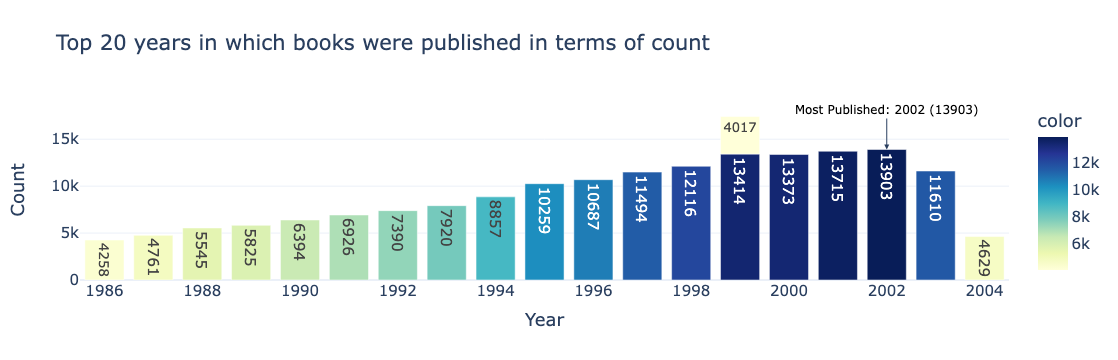

(2002, 13903)

In [19]:
plot_top20(books, 'Year-Of-Publication', 'Top 20 years in which books were published in terms of count', "Year", "Count")

👉 We can clearly observe that the year 2002 has the highest number of published books. This indicates a notable peak in book publications during that year, which could be attributed to increased literary activity, publishing trends, or the availability of data from that period.

**Trend Analysis: Total Books Published by Year**

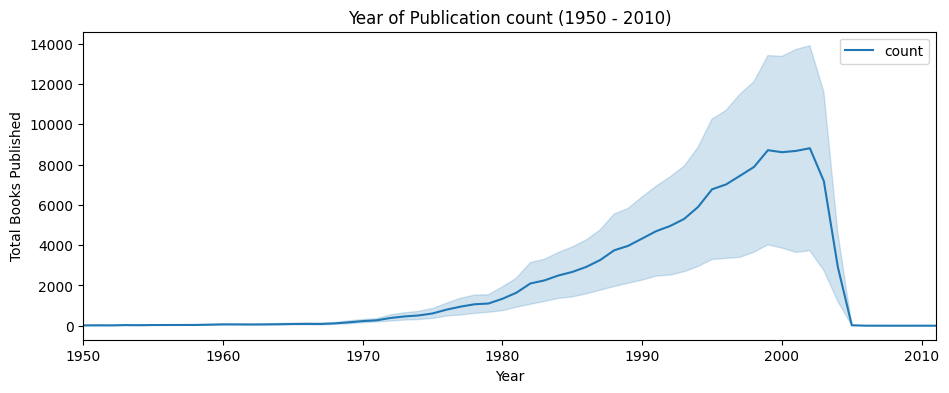

In [20]:
year_count=books['Year-Of-Publication'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(11, 4))
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

👉 The years 1999 to 2002 represent a period of peak book publications, with the highest number of books being released during this time. This surge could be linked to trends in the publishing industry, increased reader demand, or advancements in publishing technology that made book production more accessible.

**Top 20 Authors with the Most Books Published**

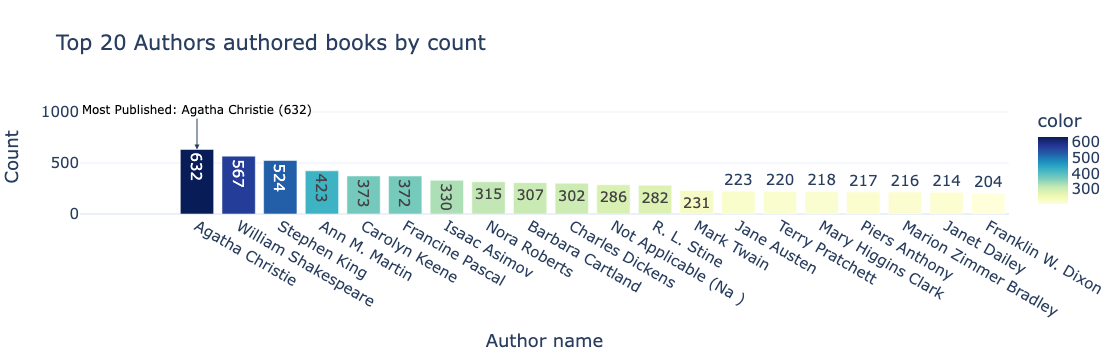

('Agatha Christie', 632)

In [21]:
plot_top20(books, 'Book-Author', "Top 20 Authors authored books by count", "Author name", "Count")

👉 Agatha Christie holds the title for the most published books, with an impressive total of 632. Additionally, William Shakespeare and Stephen King stand out as the other two authors with the highest book counts, surpassing many others in terms of total publications

**Top 20 Publishers with the Most Books Published**

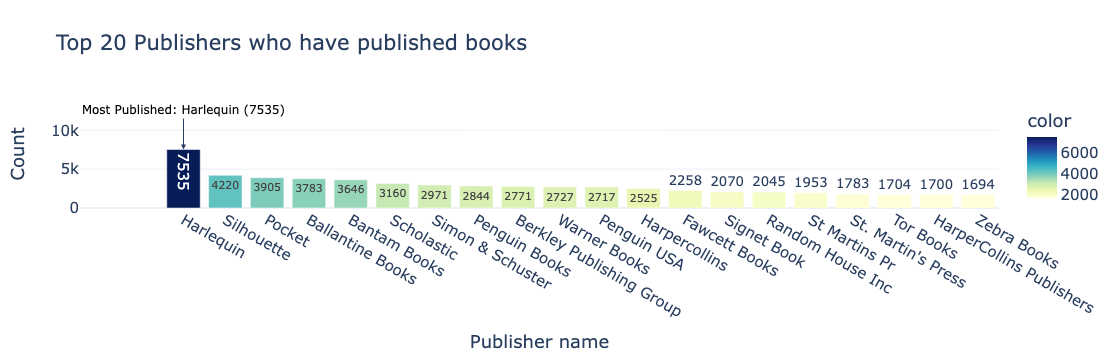

('Harlequin', 7535)

In [22]:
plot_top20(books, 'Publisher', "Top 20 Publishers who have published books", "Publisher name", "Count")

👉 Harlequin is by far the most prolific publisher, with the highest number of published books. It is followed closely by Silhouette and Pocket, which also have significant publishing counts, standing out among the other publishers.

**Users Location**

👉 We categorize users' location data by country to better understand where the majority of orders originate. This approach allows us to identify the countries with the highest order volumes.

In [23]:
countries = []
cond = users['Location'].str.split(',')

for cont in cond:
    
    countries.append(cont[-1])

users['Country'] = countries
users['Country']=users['Country'].str.upper()

👉 Now, we will visualize the top 20 countries.

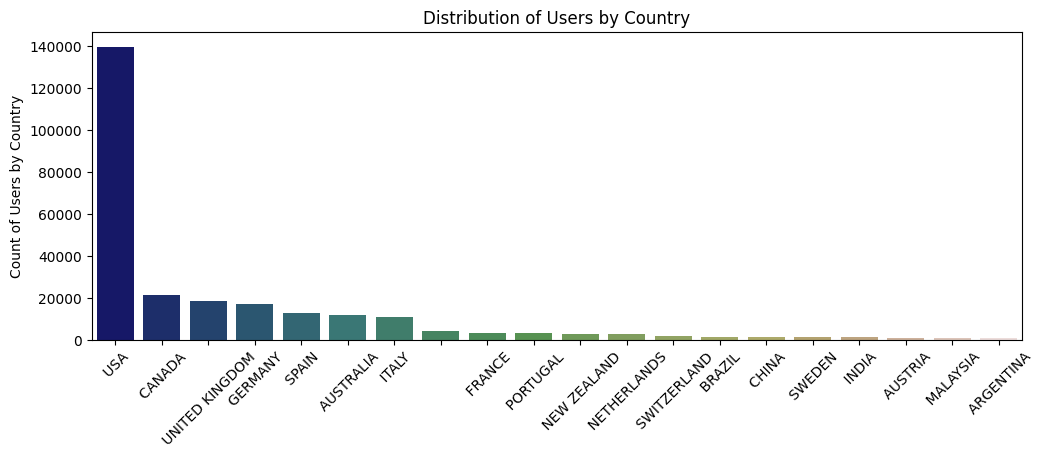

In [24]:
# Plotting the chart for the top 20 countries
plt.figure(figsize=(12, 4))

# Filter users by top 20 countries
top_20_countries = users['Country'].value_counts().head(20).index

# Create a new DataFrame for top 20 countries
top_20_users = users[users['Country'].isin(top_20_countries)]

# Plot the countplot
plot = sns.countplot(x='Country', data=top_20_users, palette="gist_earth", order=top_20_countries)

# Set title and labels
plot.set_title('Distribution of Users by Country')
plt.xlabel("")
plt.ylabel("Count of Users by Country")

# Show plot
plt.xticks(rotation=45)
plt.show()


👉 Clearly, the USA leads in the number of book purchases, which is expected given its large population. Following this, Canada ranks second, reflecting a significant, though smaller, share of book purchases compared to the USA.

**Users Age**

In [25]:
print('Maximum age is:',users['Age'].max())
print('Minimum age is:' ,users['Age'].min())

Maximum age is: 244.0
Minimum age is: 0.0


👉 In our dataset, the maximum age is recorded as 244, and the minimum age is 0, which clearly seems incorrect. To ensure data accuracy, we will filter the records to include only users whose age is between 18 and 50.

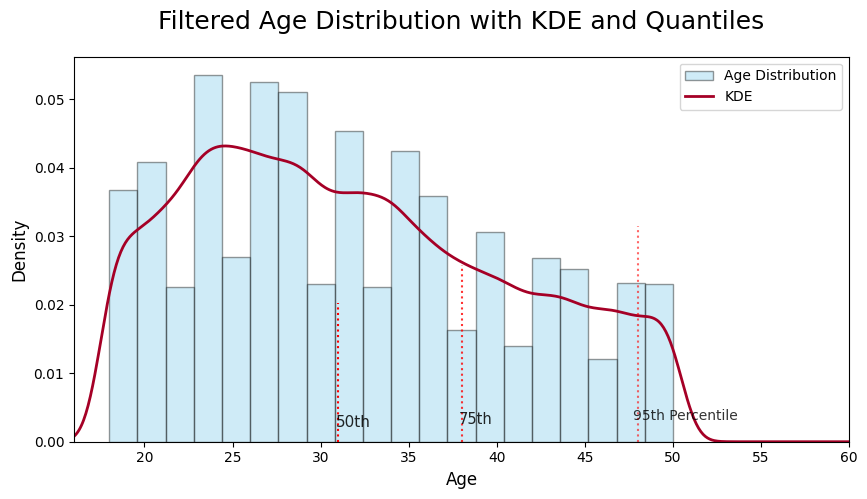

In [26]:
# Filter the age column for reasonable values (e.g., between 16 and 100)
filtered_users = users[(users['Age'] >= 18) & (users['Age'] <= 50)]

# Plot histogram and KDE
plt.figure(figsize=(10,5))
filtered_users['Age'].plot(kind="hist", density=True, alpha=0.4, bins=20, color="skyblue", edgecolor="black", label='Age Distribution')  # Increase bins for better granularity
filtered_users['Age'].plot(kind="kde", colormap='RdYlBu', linewidth=2, label='KDE')

# Calculate quantiles
quant_50, quant_75, quant_95 = filtered_users['Age'].quantile(0.5), filtered_users['Age'].quantile(0.75), filtered_users['Age'].quantile(0.95)
quants = [[quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Add quantile lines
for i in quants:
    plt.axvline(i[0], color='red', alpha=i[1], ymax=i[2], linestyle=":")

# X-axis and labels
plt.xlabel('Age', fontsize=12)
plt.xlim(16, 60)  # Focus on the filtered range

# Y-axis and labels
plt.ylabel("Density", fontsize=12)

# Add annotations for quantiles

# # Annotations
plt.text(quant_50-.13, .0021, "50th", size = 11, alpha = .85)
plt.text(quant_75-.13, .0026, "75th", size = 10.5, alpha = .85)
plt.text(quant_95-.25, .0032, "95th Percentile", size = 10, alpha =.8)

# Title
plt.title("Filtered Age Distribution with KDE and Quantiles", fontsize=18, pad=20)

# Show legend
plt.legend(loc='upper right')

# Show plot
plt.show()

👉 Looking at the graph, we can see that the average age of users is 31. Additionally, the age group with the highest number of orders falls between 24 and 30.

**Merging books and ratings**

In [27]:
books_rate = pd.merge(books, ratings, on='ISBN')

In [28]:
books_rate.head(3)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
2  http://images.amazon.com/images/P/0002005018.0...    11400            0

In [29]:

def visualize_rating_distribution(dataframe, column_name, custom_colors=None):
  
    # Default color palette if custom colors are not provided
    if custom_colors is None:
        custom_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
                         '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

    # Create subplots for bar chart and pie chart
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Bar Chart', 'Pie Chart'),
        specs=[[{"type": "xy"}, {"type": "domain"}]]
    )

    # Bar Chart: Count of each category
    fig.add_trace(
        go.Bar(
            y=dataframe[column_name].value_counts().values.tolist(),
            x=[str(i) for i in dataframe[column_name].value_counts().index],
            text=dataframe[column_name].value_counts().values.tolist(),
            textfont=dict(size=12),
            name=column_name,
            textposition='auto',
            showlegend=False,
            marker=dict(color=custom_colors,
                        line=dict(color='#DBE6EC', width=1))
        ),
        row=1, col=1
    )

    # Pie Chart: Percentage of each category
    fig.add_trace(
        go.Pie(
            labels=dataframe[column_name].value_counts().keys(),
            values=dataframe[column_name].value_counts().values,
            textfont=dict(size=12),
            showlegend=False,
            name=column_name,
            marker=dict(colors=custom_colors)
        ),
        row=1, col=2
    )

    # Update layout for better appearance
    fig.update_layout(
        title={
            'text': f"Distribution of '{column_name}'",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        template='plotly_white',
        height=500, width=900
    )

    # Show the figure
    iplot(fig)


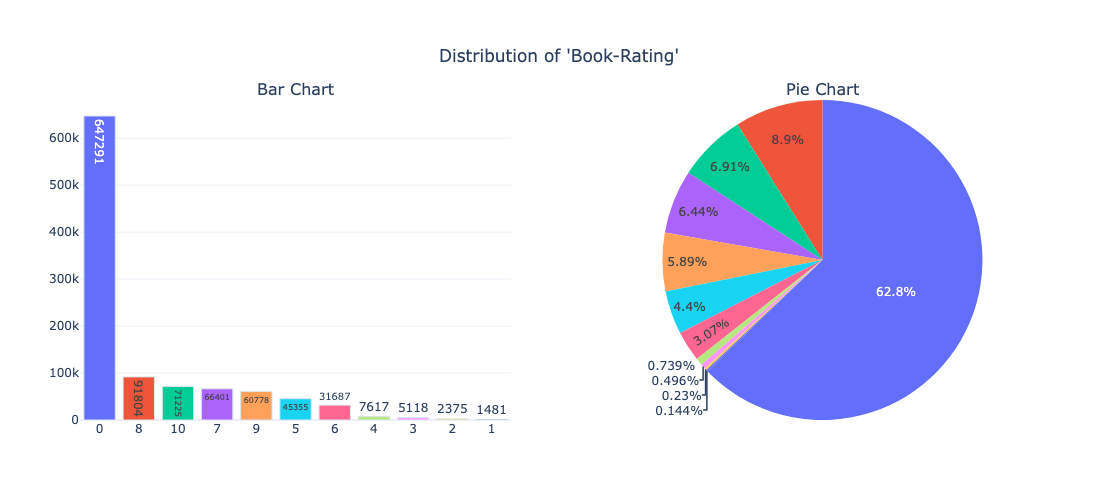

In [30]:
visualize_rating_distribution(books_rate, 'Book-Rating')

👉 Out of the total users, 647,291 (62.8%) gave a rating of 0, making it the most common rating. In contrast, 91,804 users (8.9%) rated 8. Both the bar chart and pie chart visually confirm this distribution.

Interestingly, the highest vote is 10, with 71,225 users (6.91%) selecting this rating. When we analyze the table overall, it's evident that users tend to gravitate toward extreme ratings, predominantly 0 or 8 points. This pattern suggests that user behaviour leans towards polarized evaluations, with many users categorizing their experience as either very poor or very good.

**Top 20 Authors Ranking**

👉 We will analyze the ranking scores of the top 20 most renowned authors based on their average ratings. To achieve this, we first identify the 20 authors with the most works in the dataset. From this group, we then focus on those with the highest average rating scores to highlight their popularity and reception among readers. This method offers a well-rounded perspective by taking into account both the volume of works produced and the quality of those works, as indicated by user ratings.

In [31]:
best_authors = books['Book-Author'].value_counts().head(20)
best_authors = list(best_authors.index)

In [32]:
top20_authors = pd.DataFrame(columns = books_rate.columns)

for author in best_authors:
    
    cond_df = books_rate[books_rate['Book-Author'] == author]
    
    top20_authors =  pd.concat([top20_authors, cond_df], axis=0)

👉 In the dataset, a rating of 0 does not represent an actual score but rather indicates that the book has not been rated. Since these entries do not contribute meaningful insights, we will exclude them from our analysis to focus solely on books with ratings between 1 and 10.

In [33]:
top20_author = top20_authors[top20_authors['Book-Rating'] != 0]

👉 We will compute the average rating for each author. 

In [34]:
top20_author = top20_author.groupby('Book-Author')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

👉 Now, we can visualize the result

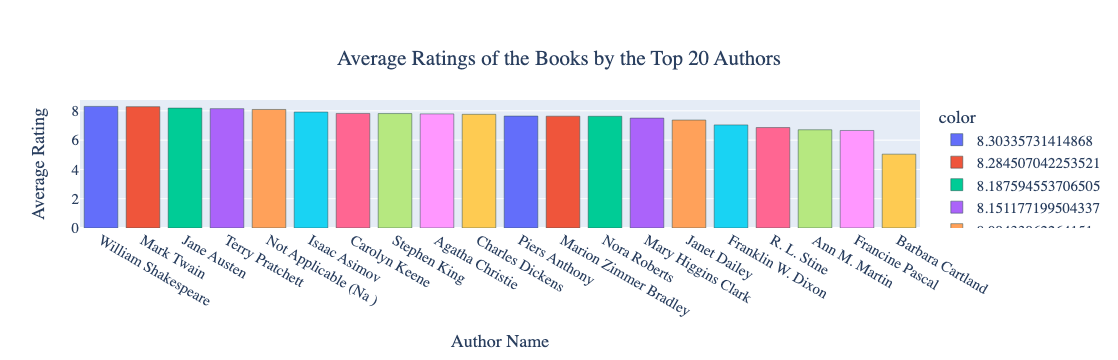

In [35]:
fig = px.bar(
    y=top20_author['Book-Rating'], 
    x=top20_author['Book-Author'], 
    color=top20_author['Book-Rating'],  # Dynamic coloring based on ratings
    #color_continuous_scale=px.colors.sequential.Teal,  # Enhanced color scheme
    #text=round(top20_author['Book-Rating'], 2),
    title="Average Ratings of the Books by the Top 20 Authors",
   # template='plotly_white'  # Clean and professional template
)

# Update layout for a polished look and remove the color legend
fig.update_layout(
    xaxis_title="Author Name",
    yaxis_title="Average Rating",
    font=dict(size=15, family="Franklin Gothic"),
    coloraxis_showscale=False,  # Disable the color legend
    title=dict(
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Additional tweaks for better readability
fig.update_traces(
    textfont=dict(size=12),
    textposition='outside',
    marker_line=dict(width=0.5, color='DarkSlateGrey')  # Add slight border for bars
)

fig.show()


👉 The bar chart highlights the top 10 authors with the highest average review ratings. Among them, William Shakespeare stands out as the highest-rated author, with Mark Twain closely following him, showing only a slight difference in their rankings. 

**Most Rated Books by Users**

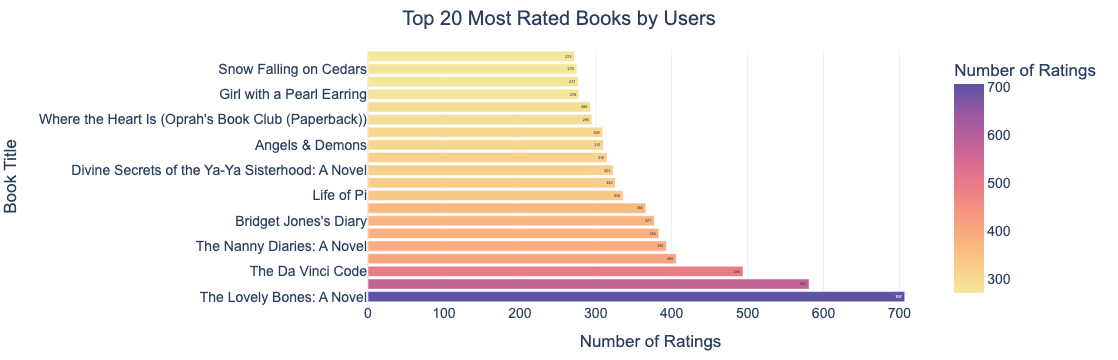

In [36]:
# Merge the datasets and filter out ratings of 0
df = pd.merge(books_rate, users, on='User-ID')
df = df[df['Book-Rating'] != 0]

# Group by book titles and count the number of ratings
top_books = df['Book-Title'].value_counts().head(20).reset_index()
top_books.columns = ['Book Title', 'Number of Ratings']

# Create an interactive bar chart
fig = px.bar(
    top_books, 
    x='Number of Ratings', 
    y='Book Title', 
    orientation='h',  # Horizontal bars for better readability
    title="Top 20 Most Rated Books by Users", 
    text='Number of Ratings', 
    color='Number of Ratings',  # Color intensity based on number of ratings
    color_continuous_scale=px.colors.sequential.Sunset  # Enhanced color scheme
)

# Update the layout for a polished look
fig.update_layout(
    xaxis_title="Number of Ratings",
    yaxis_title="Book Title",
    template="plotly_white",  # Clean and modern style
    font=dict(size=14, family="Arial"),
    title=dict(x=0.5, xanchor='center'),
    height=600,  # Adjust height for better readability
    margin=dict(l=100, r=30, t=50, b=50)  # Tweak margins for aesthetics
)

# Show the plot
fig.show()


👉 The book with the highest number of purchases and ratings is The Lovely Bones: A Novel. The second most rated book is Wild Animus, followed by The Da Vinci Code, which ranks as the third most popular book. These titles stand out as the top choices among readers, reflecting their widespread appeal and engagement.

**Top 20 Books Based on Average Rating**

In [37]:
# Get the top 20 most rated books
books_top20 = df['Book-Title'].value_counts().head(20).index

# Filter the dataset for these top 20 books
top20_books = df[df['Book-Title'].isin(books_top20)]

# Exclude the books with a rating of 0
top20_books = top20_books[top20_books['Book-Rating'] != 0]

# Calculate the mean rating for each book and sort by the rating in descending order
top20_books = top20_books.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

# Get the top 10 books with the highest average ratings
top10_books = top20_books.head(10)


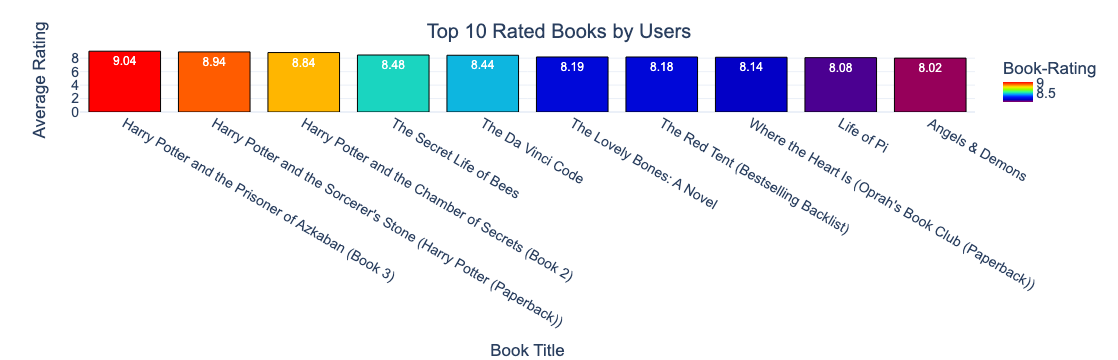

In [38]:
# Create a bar chart with a more vibrant color palette and updated design
fig = px.bar(
    top10_books, 
    y='Book-Rating', 
    x='Book-Title', 
    color='Book-Rating',  # Dynamically color the bars based on ratings
    color_continuous_scale=px.colors.sequential.Rainbow,  # Vibrant color scale for better visibility
    text=top10_books['Book-Rating'].round(2),  # Display rounded ratings on the bars
    title="Top 10 Rated Books by Users",  # Chart title
    template='plotly_white'  # Dark background for better contrast
)

# Update layout for better presentation
fig.update_layout(
    xaxis_title="Book Title",
    yaxis_title="Average Rating",
    title=dict(
        x=0.5,  # Center the title
        xanchor='center', 
        yanchor='top'
    ),
    font=dict(size=14, family="Arial"),  # Adjust font for readability
    showlegend=False,  # Hide legend as it's unnecessary for this chart
    height=500,  # Set a specific height for better visualization
    margin=dict(l=80, r=50, t=50, b=100)  # Adjust margins for better layout
)

# Add labels to bars for better clarity
fig.update_traces(
    textfont=dict(size=12, color='white'),  # White text for readability
    textposition='inside',  # Position the text inside the bars
    marker_line=dict(width=1, color='black')  # Add a slight border to each bar for clarity
)

# Show the plot
fig.show()


👉 The top 3 most rated books are from the Harry Potter series. It is evident that the Harry Potter books have the highest sales volume, as they consistently receive the most ratings. This indicates their massive popularity among readers across various age groups and regions. 

## Preprocessing

👉 After visualizing the data, we will perform some preprocessing steps to clean and prepare the dataset for further analysis. This includes removing any irrelevant or unnecessary columns that do not contribute to the insights we aim to extract from the data.

👉 We will combine the books and ratings datasets into a single unified dataset.

In [8]:
books_data=books.merge(ratings,on="ISBN")
books_data.head(3)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  User-ID  Book-Rating  
0  http://images.amazon.com/images/P/0195153448.0...        2            0  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
2  http://images.amazon.com/images/P/0002005018.0...    11400            0

In [9]:
# Creating a copy of the books dataset
df = books_data.copy()

# Dropping rows with missing values
df.dropna(inplace=True)

# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Dropping unnecessary columns that won't be used in the analysis
df.drop(columns=["ISBN", "Year-Of-Publication", "Image-URL-M", "Image-URL-S"], axis=1, inplace=True)

# Removing rows where the book rating is 0
df.drop(index=df[df["Book-Rating"] == 0].index, inplace=True)

# Cleaning the book titles by removing special characters
df["Book-Title"] = df["Book-Title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())

# Displaying the first few rows of the cleaned dataframe
df.head(3)


Book-Title           Book-Author              Publisher  \
1  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
3  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   
5  Clara Callan  Richard Bruce Wright  HarperFlamingo Canada   

                                         Image-URL-L  User-ID  Book-Rating  
1  http://images.amazon.com/images/P/0002005018.0...        8            5  
3  http://images.amazon.com/images/P/0002005018.0...    11676            8  
5  http://images.amazon.com/images/P/0002005018.0...    67544            8

# 3.Based Collaborative Filtering

**Collaborative Filtering** is a method used to predict a user’s preferences by analyzing the tastes of similar users. It assumes that if two users have similar reactions to some items, they will likely agree on others as well.

The two main types are:

* **User-Based**: Finds users who have rated items similarly and uses their ratings to predict missing ratings for other items.
  
* **Item-Based**: Analyzes the relationships between items (e.g., users who bought item Y also bought item Z) to predict ratings for unrated items.
  
Both methods focus on leveraging shared preferences and behaviors to make recommendations.

Now, we will explain and analyze each types of filtering.

## 3.1.User-Based Collaborating Filtering

👉 To begin with, we will filter out users who have rated more than 200 books. This step ensures that we focus on active users with enough data to provide more accurate and reliable recommendations. By doing so, we can enhance the quality of our suggestions, ensuring they are based on robust user preferences.

In [41]:
# Filter users who have rated more than 200 books
new_df = df[df['User-ID'].map(df['User-ID'].value_counts()) > 200]

# Create a pivot table for user ratings
users_pivot = new_df.pivot_table(index=['User-ID'], columns=['Book-Title'], values='Book-Rating')

# Replace missing values (NaN) with 0 (if a user hasn't rated a book)
users_pivot.fillna(0,inplace=True)


In [42]:
users_pivot.shape

(118, 41479)

👉 After filtering the users who have rated more than 200 books, we are left with a total of 118 users. The dataset now contains 41479 unique books.

In [43]:
def users_choice(id):
    # Filter the data for the user with the given ID and sort by "Book-Rating" in descending order
    users_fav = new_df[new_df["User-ID"] == id].sort_values(["Book-Rating"], ascending=False)[0:5]
    return users_fav


👉 The function `users_choice(id)` filters the dataset for a specific user based on their `User-ID`, sorts their rated books in descending order of `Book-Rating`, and then selects the top 5 highest-rated books. It helps us retrieve the most preferred books for a user.


In [44]:
def user_based(new_df, id):
    if id not in new_df["User-ID"].values:
        print("⚠️ User not found! ⚠️") 
        
    
    else:
        # Find the index of the user in the pivot table
        index = np.where(users_pivot.index == id)[0][0]
        
        # Compute cosine similarity between users
        similarity = cosine_similarity(users_pivot)
        
        # Get the top 5 most similar users
        similar_users = list(enumerate(similarity[index]))
        similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)[0:5]  # Exclude the user themselves
       
        user_rec = []
    
        # Collect books rated by the most similar users
        for i in similar_users:
            data = df[df["User-ID"] == users_pivot.index[i[0]]]
            user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))  # Collect book titles instead of user IDs
        
        return user_rec


👉 The `user_based` function provides book recommendations by finding users with similar ratings. It uses cosine similarity to identify the top 5 most similar users and suggests books based on their preferences. If the user is not found, it displays an error message.

In [45]:
def common(new_df, user, user_id):
    # Get the books rated by the target user
    target_user_books = new_df[new_df["User-ID"] == user_id]
    
    # Initialize an empty list to store recommended books
    recommend_books = []

    # Iterate through the similar users
    for similar_user in user:
        # Get the books rated by the similar user
        similar_user_books = new_df[new_df["User-ID"] == similar_user]
        
        # Filter out the books already rated by the target user
        books_to_recommend = similar_user_books.loc[~similar_user_books["Book-Title"].isin(target_user_books["Book-Title"]),:]
        
        # Sort books by rating and select the top 5
        books_to_recommend = books_to_recommend.sort_values(["Book-Rating"], ascending=False)[0:5]
        
        # Add the recommended books to the list
        recommend_books.extend(books_to_recommend["Book-Title"].values)
    
    # Return the top 5 recommended books (if there are more than 5, we take the first 5)
    return recommend_books[0:5]


👉 The `common` function recommends books for a target user based on the ratings of similar users. It filters out books already rated by the target user, sorts the remaining books by rating, and returns the top 5 recommended books.


In [46]:
def load_image_from_url(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    try:
        response = requests.get(url, headers=headers, stream=True, timeout=10)  # Added timeout for network delays
        response.raise_for_status()  # Raise an exception for HTTP errors
        img = Image.open(response.raw)  # Open image if valid response
        img = img.convert("RGB")  # Convert to RGB if it's not in that format
        return img
    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Error loading image from URL: {url} - {e}")
        return None  # Return None in case of an error

👉The `load_image_from_url` function indicates that fetch and process an image from a URL, handling network and file errors gracefully.

In [91]:
def calculate_recommendation_score(book_title, book_list, df):

    # Average rating of the book
    avg_rating = df[df["Book-Title"] == book_title]["Book-Rating"].mean()
    
    # Create the user-item matrix for the books in the list
    book_ratings = df[df['Book-Title'].isin(book_list)]  # Get ratings for the books in the list
    book_ratings_matrix = book_ratings.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)

    # Compute cosine similarity between the target book and all other books
    cosine_sim = cosine_similarity(book_ratings_matrix.T)
    
    # Find the index of the target book
    book_idx = book_ratings_matrix.columns.get_loc(book_title)
    
    # Get similarity scores for the target book against all other books in the list
    similarity_scores = cosine_sim[book_idx]

    # Calculate the weighted similarity score (considering the similarity with all other books)
    weighted_similarity = np.mean(similarity_scores)

    # Calculate the final recommendation score by combining average rating and similarity
    recommendation_score = 0.7 * avg_rating + 0.3 * weighted_similarity
    return round(recommendation_score, 2)

👉 The `calculate_recommendation_score` function to calculate the recommendation score based on average rating and cosine similarity

In [88]:

def resize_image(img, target_width=200, target_height=300):
    img.thumbnail((target_width, target_height))
    return img

👉 The `resize_image` function is to adjust image size and maintain aspect ratio

Now, we will plot the user's favorite books and their ratings

💁‍♂️ Random Book User Number: 204864 
-------------------------------


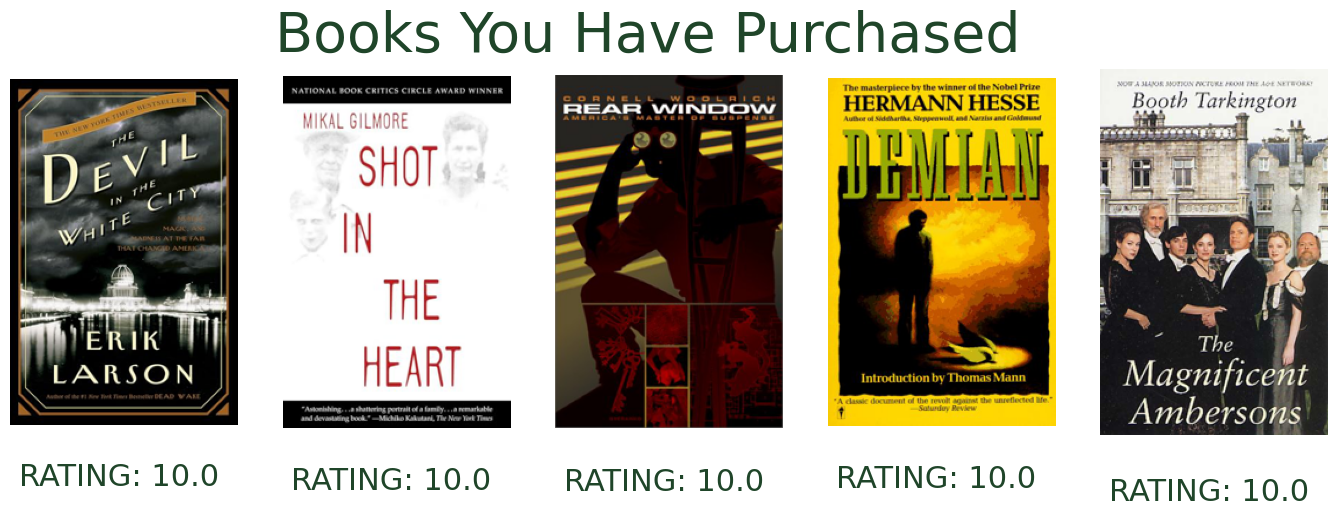

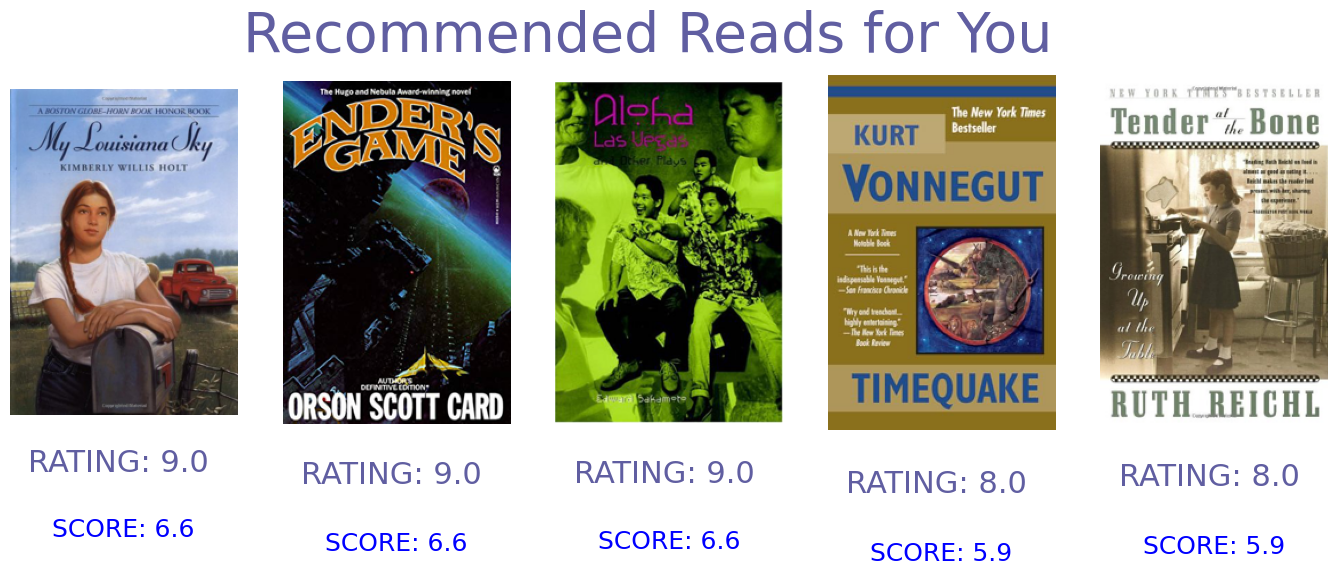

In [90]:
#Select random user from data
user_id= random.choice(new_df["User-ID"].values)
user_choice_df=pd.DataFrame(users_choice(user_id)) 
user_favorite=users_choice(user_id)
n=len(user_choice_df["Book-Title"].values)
print("💁‍♂️ Random Book User Number: {} ".format(user_id))
    
fig,ax=plt.subplots(1,n,figsize=(17,5))
fig.suptitle("Books You Have Purchased",fontsize=40,color="#1F4529")
    
for i in range(n):
        url=new_df.loc[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
        #Load the image
        img = load_image_from_url(url)
        if img: # Only display if the image is loaded successfully
            img = resize_image(img)  # Resize the image to fit
            ax[i].imshow(img)
            ax[i].axis("off")
            ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==user_choice_df["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="#1F4529",fontsize=22)
            fig.show()

# Get book recommendations for the user
user_based_rec=user_based(new_df,user_id)
books_for_user=common(new_df,user_based_rec,user_id)
books_for_userDF=pd.DataFrame(books_for_user,columns=["Book-Title"])

fig,ax=plt.subplots(1,5,figsize=(17,5))
print('-------------------------------')
fig.suptitle("Recommended Reads for You",fontsize=40,color="#605EA1")
for i in range(5):
    book_title = books_for_userDF["Book-Title"].tolist()[i]
    url=new_df.loc[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i],"Image-URL-L"][:1].values[0]
    img = load_image_from_url(url)
    if img:
        # Calculate recommendation score
        new_df = new_df.drop_duplicates(subset=['Book-Title'], keep='first')
        recommendation_score = calculate_recommendation_score(book_title, books_for_userDF["Book-Title"].tolist(), new_df)
        img = resize_image(img)  # Resize the image to fit
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title("RATING: {} ".format(round(new_df[new_df["Book-Title"]==books_for_userDF["Book-Title"].tolist()[i]]["Book-Rating"].mean(),1)),y=-0.20,color="#605EA1",fontsize=22)
        ax[i].text(0.5, -0.35, "SCORE: {}".format(recommendation_score), ha="center", va="center", fontsize=18, color="blue", transform=ax[i].transAxes)
        
        fig.show()

## 3.2. Item-Based Collaborating Filtering


In this section, we will focus on item-based collaboration filtering. To briefly summarize the operations we will perform:

* **Search for Books**: The function searches for books in the dataset that contains the provided book title (case-insensitive).
   
* **Handle Rare Books**: If the book is rare (having fewer than 200 ratings), the function will recommend other popular books instead.
 
* **Recommend Similar Books**: For common books, the function calculates correlations between the provided book and other books, recommending the most similar user ratings.
   
* **Filter Low-Rated Books**: It excludes books with an average rating below 5 to ensure quality recommendations.

* **Display Recommendations**: The function then visualizes the top 5 recommended books with images and average ratings.

If the book is not found in the dataset, the function will inform the user that the book couldn't be located.


In [10]:
def item_based(bookTitle):
    # Normalize bookTitle to lowercase
    bookTitle = str(bookTitle).lower() 
    
    # Search for books that contain the keyword (substring match)
    matching_books = df[df["Book-Title"].str.contains(bookTitle, case=False, na=False)]
    
    if not matching_books.empty:
        # Choose the first matching book title
        bookTitle = matching_books["Book-Title"].values[0]
        #print(f"Did you try this: {bookTitle}")
        
        # Proceed with the rest of the recommendation logic
        rating_count = pd.DataFrame(df["Book-Title"].value_counts())
        rating_count.columns = ['count']
        
        # Define rare books (those with <= 200 ratings)
        rare_books = rating_count[rating_count["count"] <= 200].index
        
        common_books = df[~df["Book-Title"].isin(rare_books)]
        
        if bookTitle in rare_books:
            # If the book is rare, suggest random common books
            most_common = pd.Series(common_books["Book-Title"].unique()).sample(3).values
            print("Sorry No Recommendations ☹️ \n")
            print("This book is rare and has limited recommendations. But you may try these popular books: \n ")
            for book in most_common:
                print(f"{book}\n")
        
        else:
            common_books_pivot = common_books.pivot_table(index="User-ID", columns="Book-Title", values="Book-Rating")
            title = common_books_pivot[bookTitle]
            recommendation_df = pd.DataFrame(common_books_pivot.corrwith(title).sort_values(ascending=False)).reset_index(drop=False)
            
            # Drop the original book from the recommendations
            recommendation_df = recommendation_df[recommendation_df["Book-Title"] != bookTitle]
            
            # Filter out books with low average ratings (< 5)
            less_rating = [i for i in recommendation_df["Book-Title"] if df[df["Book-Title"] == i]["Book-Rating"].mean() < 5]
            recommendation_df = recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]
            
            # Limit to the top 5 recommendations
            recommendation_df = recommendation_df.head(5)
            recommendation_df.columns = ["Book-Title", "Correlation"]
            
            # Display recommendations
            fig, ax = plt.subplots(1, 5, figsize=(17, 5))
            fig.suptitle("Looking for Your Next Read? Check These Out!", fontsize=30, color="#355F2E")
            
            for i in range(len(recommendation_df["Book-Title"].tolist())):
                url = df.loc[df["Book-Title"] == recommendation_df["Book-Title"].tolist()[i], "Image-URL-L"].values[0]
                img = load_image_from_url(url)
                ax[i].imshow(img)
                ax[i].axis("off")
                ax[i].set_title(f"RATING: {round(df[df['Book-Title'] == recommendation_df['Book-Title'].tolist()[i]]['Book-Rating'].mean(), 1)}", y=-0.20, color="#355F2E", fontsize=22)
            
            fig.show()
    else:
        print("❌ Oops! We couldn't locate this book right now 😔. Check back later, it might be available in our database!")


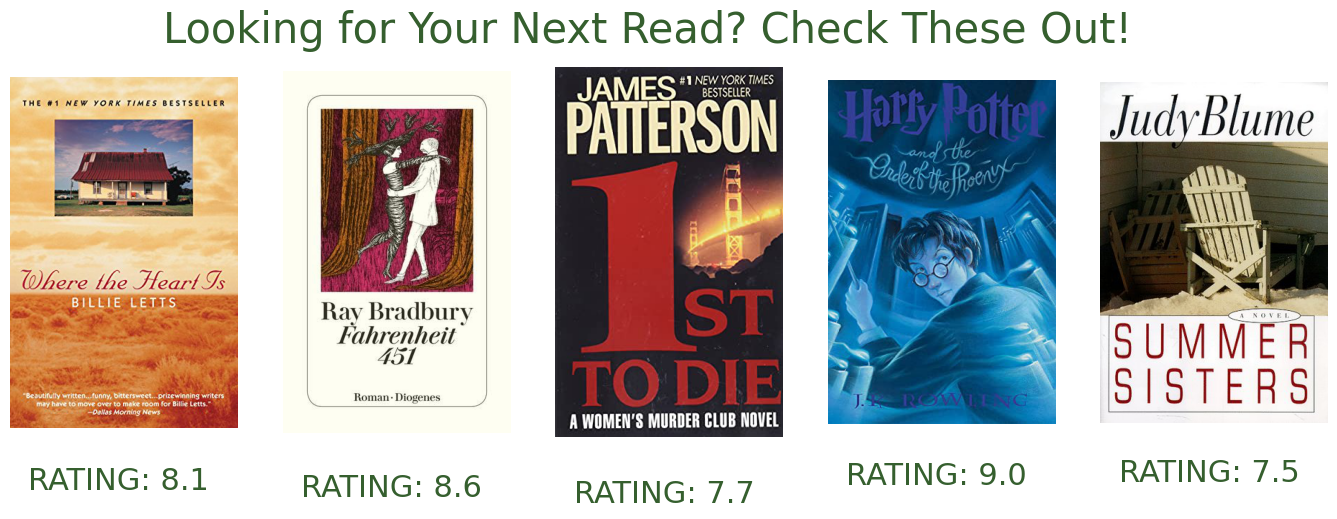

In [139]:
item_based("The Da Vinci Code")

In [199]:
item_based('Twilight')

Sorry No Recommendations ☹️ 

This book is rare and has limited recommendations. But you may try these popular books: 
 
The Red Tent Bestselling Backlist

The Da Vinci Code

The Street Lawyer



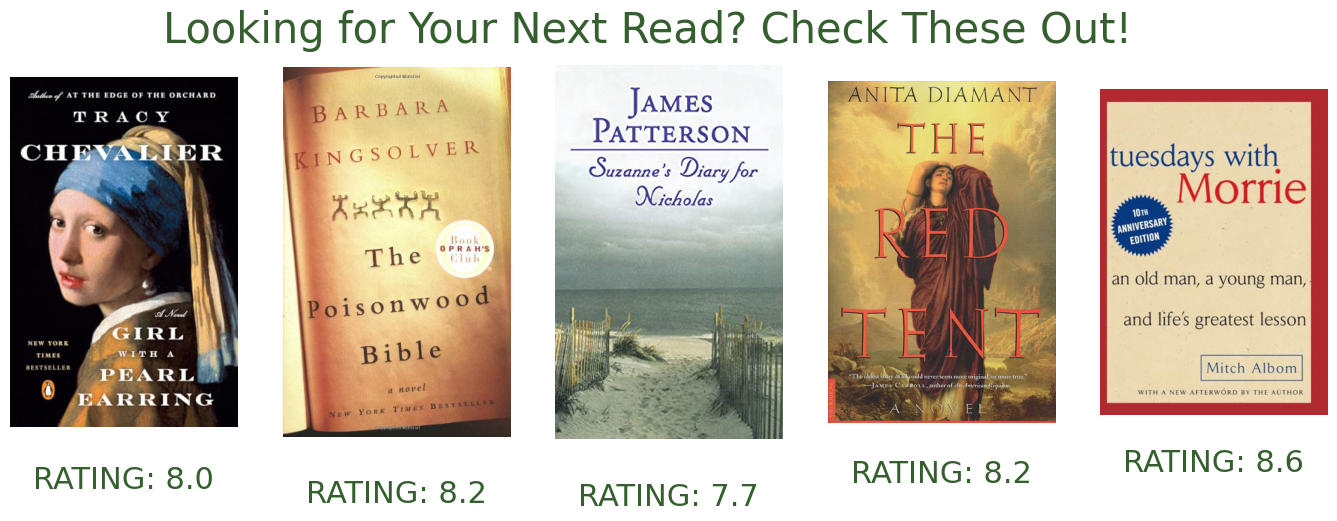

In [200]:
item_based('The Street Lawyer')

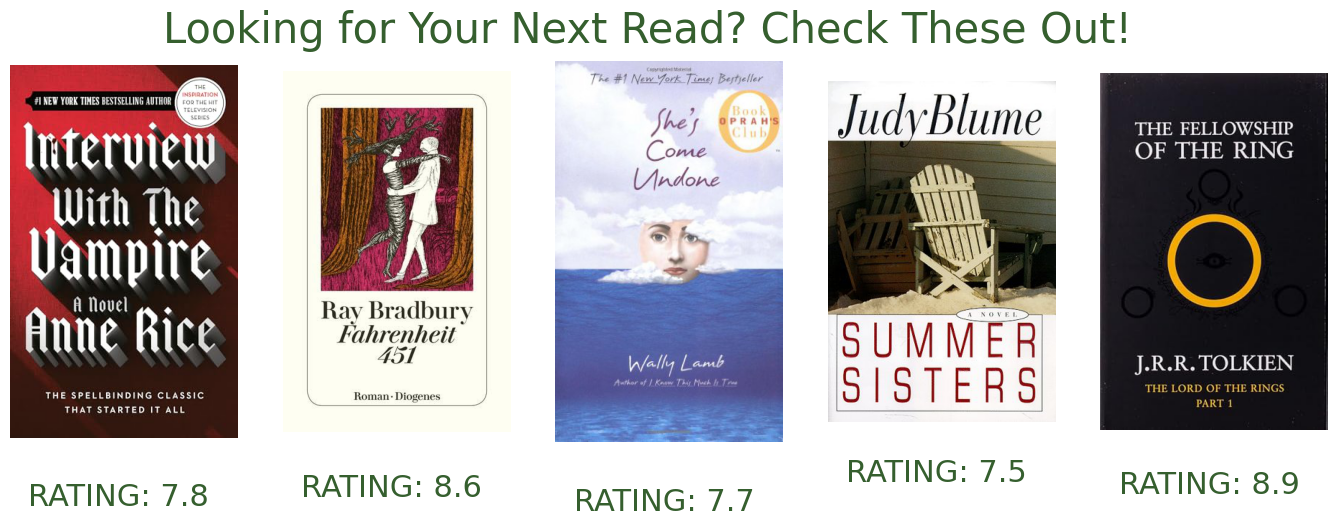

In [152]:
item_based('Life of Pi')

In [11]:
item_based('A Story of Yesterday')

❌ Oops! We couldn't locate this book right now 😔. Check back later, it might be available in our database!


## 4. Conclusion 🌻

In this project, our primary focus is on building a book recommendation system. Within this notebook, we conducted an in-depth analysis of the dataset, performed necessary preprocessing steps, and visualized the data to gain meaningful insights. Following this, we implemented both user-based and item-based collaborative filtering techniques to provide personalized book recommendations to users. 

Thank you for taking the time to explore this notebook. I hope you find it both insightful and enjoyable.

## 5. Future Planning 🔮

To further enhance this project, we propose the following ideas:  

1. **Content-Based Filtering**  
   - We plan to analyze book attributes such as genres, authors, and keywords to recommend similar titles to users.  

2. **Hybrid Recommendation System**  
   - By combining collaborative filtering with content-based methods, we aim to improve recommendation accuracy and offer a more personalized experience.  

3. **Popularity-Based Recommendations**  
   - Using popularity metrics, we will suggest trending or bestselling books that are widely appreciated by readers.  

4. **Demographic-Based Recommendations**  
   - Although we currently lack sufficient demographic data, future iterations could incorporate user-specific information such as age, location, and preferences to tailor recommendations.  

5. **Sentiment Analysis**  
   - With access to user reviews and feedback, we can analyze sentiments to identify and recommend highly praised books, enhancing user satisfaction.  

These strategies offer potential pathways to make the recommendation system more robust and user-focused.